# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). 

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page: 

* The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
* For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Data

We will work with 2 data sets. The first (`previous`) contains inforamtion from  Hickey's analysis and second - `after` was made latter.

Let's read our both data sets.

In [1]:
import pandas as pd

previous  = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

Our project focus only on Fandango's movies onyl, so we can isolate columns below:

In [2]:
fandango_prev = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

fandango_after  = after[['movie', 'year', 'fandango']].copy()
#using copy() to avoid SettingWithCopyWarning 

In [3]:
fandango_prev.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
fandango_prev.shape

(146, 5)

In [5]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [6]:
fandango_after.shape

(214, 3)

## Population

Our aim is to investigate that if there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we colud get sampling errors.

** Did all the movies have an equal chance to be included in the two samples? **
Not, becasue all movies in both data sets have to:

* The movie must have been released in 2016 or later,
* The movie must have had a considerable number of votes and reviews.


## Changing the Goal of our Analysis

Our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

## Isolating the Samples We Need

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [7]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Now, we will check how many people voted for each movie above.

Here our findings:

* Mechanic: Resurrection	2247
* Warcraft	7271
* Max Steel	493
* Me Before You	5263
* Fantastic Beasts and Where to Find Them	13400
* Cell	17
* Genius	127
* Sully	11877
* A Hologram for the King	500
* Captain America: Civil War	35057

9/10 movies are popular in our sample, so we can go forward with our analysis.

We can also check `fandango_prev` data set, if all movies are popular.

In [8]:
fandango_prev[fandango_prev['Fandango_votes'] < 30]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference


All movies in `fandango_prev` are popular.

Now, for our purpose, we will isolate mvoies released in 2015 and 2016. Let's start do it in `fandango_prev`.

In [9]:
fandango_prev.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [10]:
fandango_prev['Year'] = fandango_prev['FILM'].str[-5:-1]
fandango_prev['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [11]:
#isolate date set with movies realased in 2015 only
fandango_2015 = fandango_prev[fandango_prev['Year'] == '2015'].copy()

In [12]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [13]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [14]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

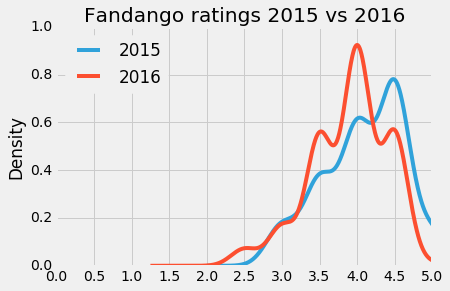

In [15]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label= '2015', legend=True)
fandango_2016['fandango'].plot.kde(label= '2016', legend=True)
plt.title('Fandango ratings 2015 vs 2016')
plt.xlim((0,5))
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Looking at graph above, we noticed that each distribution is **left skewd**. We may also see that distribution with ratings form 2016 is slightly shifted to the left. It could means that total average of ratings from 2016 decrease compare to 2015 so it may be an interesting evidence that Fandango lowered some ratings. However, we can't confirm it now, but we can go forward to check that difference more closely.



## Comparing Relative Frequencies

It's time to compare both distrubutions, however our samples contain different number of movies, so the best way will be examine the propotion for each rating.

In [16]:
print('2015:\n')
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100 #get values in %


2015:



3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [17]:
print('2016:\n')
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100 #get values in %

2016:



2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Looking at both frequency distribution tables we see that there is 2 huge difference, for rating 4.5 in 2015 - 38%, in 2016 - 24,6% (decrease by 13,5%) and for rating 4.0 - 29% in 2015, 40% in 2016. 

Probably ratings 4.5 and more has been change by 0.5 down or more and we can see that in 2016 there is more frequency in ratings 4.0 and less.

However, rating 3.0 in both distributions remainded at similar level.

## Determining the Direction of the Change

In [18]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] #take first argument from mode output

mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0] #take first argument from mode output

stats = pd.DataFrame()
stats['2015'] = [mean_2015, median_2015, mode_2015]
stats['2016'] = [mean_2016, median_2016, mode_2016]
stats.index = ['mean','median','mode']
stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


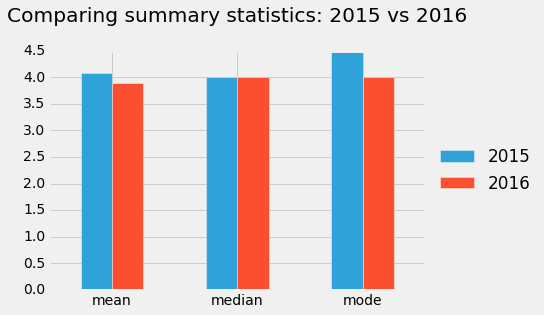

In [19]:
stats.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) #take legend otside the graph
plt.title('Comparing summary statistics: 2015 vs 2016', y=1.10)
plt.show()

Looking at table above we can see that:

* mean decreases from 4.08 to 3.88
* mode has been change from 4.5 to 4.0
* median is on the similar level

## Concluions

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.